In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
import cv2


In [2]:
file_names = ['syn01.jpg', 'syn02.jpg', 'syn03.jpg', 'syn04.jpg']
bg_file_names = ['bg01.jpg', 'bg02.jpg']

In [3]:
img = plt.imread(file_names[0])

In [4]:
img.shape

(508, 800, 3)

In [8]:
img = cv2.resize(img, (200,200), interpolation=cv2.INTER_CUBIC)

In [9]:
img.shape

(200, 200, 3)

In [20]:
img.min(), img.max()

(0, 255)

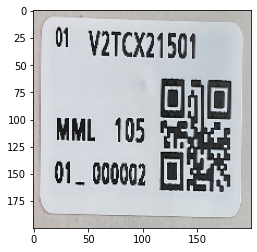

In [10]:
plt.imshow(img)

In [5]:
plt.imsave('out.jpg', img)

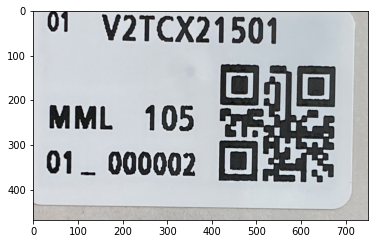

In [6]:
plt.imshow(img[40:,50:,:])

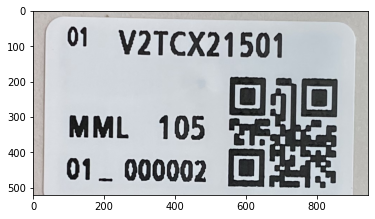

In [15]:
plt.imshow(img[:-80,:,:])

In [11]:
def random_crop_label(img):
    img_h, img_w, _ = img.shape
    start_x = np.random.randint(20, int(img_w/6))
    end_x = np.random.randint(20, int(img_w/6))
    start_y = np.random.randint(20, int(img_h/3))
    end_y = np.random.randint(20, int(img_h/3))
    croped_img = img[start_y:-end_y,start_x:-end_x,:]
    return croped_img

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

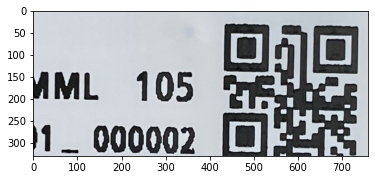

In [39]:
plt.imshow(random_crop_label(img))

In [87]:
croped = random_crop_label(img)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

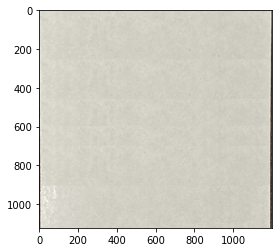

In [59]:
bg = plt.imread(bg_file_names[0])
plt.imshow(bg)

In [88]:
h, w, c = croped.shape

In [89]:
h, w, c

(410, 776, 3)

In [90]:
new_img = np.zeros(bg.shape)
new_img.shape

<IPython.core.display.Javascript object>

(1123, 1200, 3)

In [92]:
new_img[:,:,:] = bg[:,:,:]

In [93]:
new_img[60:h+60, 80:w+80, :] = croped[:,:,:]

<IPython.core.display.Javascript object>

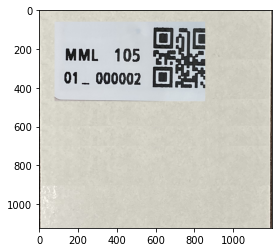

In [96]:
plt.imshow(np.array(new_img, dtype=int))

In [55]:
np.random.randint(2)

<IPython.core.display.Javascript object>

1

In [25]:
def generate_random_img(num=10000):
    
    img_list = []
    for file in file_names:
        img_list.append(plt.imread(file))
    bg_list = []
    for bg in bg_file_names:
        bg_list.append(plt.imread(bg))
    
    
    for i in range(num):
        # Select random image 
        img = img_list[np.random.randint(len(file_names))]
        # select random bg 
        bg = bg_list[np.random.randint(len(bg_file_names))]
        new_img = np.zeros(bg.shape)
        bh, bw, bc = bg.shape
        new_img[:,:,:] = bg[:,:,:]
        if np.random.randint(2)==0:
            # Make False case
            label='f'
            croped_img = random_crop_label(img)
            h, w, c = croped_img.shape
            start_x_bg = int((bw-w)/2)+np.random.randint(int((bw-w)/3))
            start_y_bg = int((bh-h)/2)+np.random.randint(int((bh-h)/3))
            new_img[start_y_bg:h+start_y_bg, start_x_bg:w+start_x_bg, :] = croped_img[:,:,:]
            save_file_name = f"./valid/false/{label}_{i}.jpg"
            
        else:
            # Make True Case 
            label='t'
            h, w, c = img.shape
            start_x_bg = int((bw-w)/2)+np.random.randint(int((bw-w)/3))
            start_y_bg = int((bh-h)/2)+np.random.randint(int((bh-h)/3))
            new_img[start_y_bg:h+start_y_bg, start_x_bg:w+start_x_bg, :] = img[:,:,:]
            save_file_name = f"./valid/true/{label}_{i}.jpg"
        
        #new_img = np.array(new_img, dtype=int)
        new_img = cv2.resize(new_img, (600,600), interpolation=cv2.INTER_LINEAR)

        new_img = new_img/255. 
        plt.imsave(save_file_name, new_img)
        
        if i % 500 == 0:
            print (f"index : {i} saved")


In [26]:
generate_random_img(1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

index : 0 saved
